In [ ]:
%%capture
!pip install yfinance
import pandas as pd
import yfinance as yf # import libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore') 
from google.colab import files
import tqdm.notebook as tq
from pandas_datareader import data as pdr

!pip install monthly-returns-heatmap
import monthly_returns_heatmap as mrh

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive") #connect to google drive

Mounted at /content/gdrive


In [ ]:
# taking all trading dates from yahoo finance daily data, 03-11 month 2021
all_dates = yf.download('^NSEI', 
                        start='2021-03-01', 
                        end='2021-11-30')
all_dates=all_dates.reset_index()
all_dates['Date']=all_dates['Date'].astype(str)
all_dates_list=list(all_dates['Date'])

[*********************100%***********************]  1 of 1 completed


In [ ]:
# making sure we do not take any pre market or after market timings
# data taken is from trading view
data=pd.read_csv('/content/gdrive/MyDrive/NIFTYDATA/nifty_trading_view.csv')
data['datetime']=data['datetime'].astype(str)
data['Date']=data['datetime'].str.split(' ',expand=True)[0] #seperate date
data['Time']=data['datetime'].str.split(' ',expand=True)[1] # seperate time
data=data[data['Time'].str.contains('09:15:00|09:30:00|09:45:00|10:00:00|10:15:00|10:30:00|10:45:00|11:00:00|11:15:00|11:30:00|11:45:00|12:00:00|12:15:00|12:30:00|12:45:00|13:00:00|13:15:00|13:30:00|13:45:00|14:00:00|14:15:00|14:30:00|14:45:00|15:00:00|15:15:00')]
data=data.reset_index().drop('index',axis=1)

In [ ]:
data=data[['open','high','low','close','Date','Time']] # discard rest 

In [ ]:
print(data.head(1))
print(data.tail(1))

      open      high       low    close        Date      Time
0  14708.1  14732.15  14638.85  14680.8  2021-03-01  09:15:00
          open      high      low     close        Date      Time
4624  17166.95  17188.15  17162.7  17185.95  2021-12-01  15:15:00


**CHECKING FOR CASE 01-11-2021**

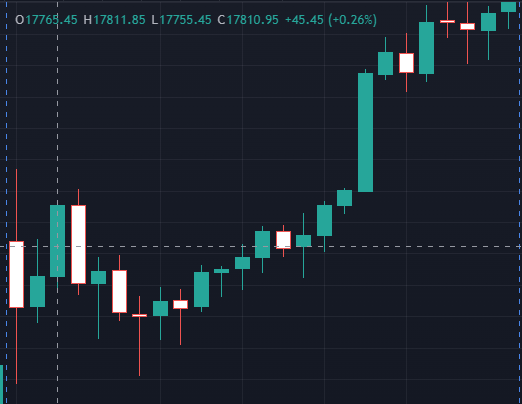

In [ ]:
data1=data[data['Date'] == '2021-11-01'].reset_index().drop('index',axis=1) # checking for 1 case 
refernce_candle = 2
buy = data1['high'][refernce_candle] + 5 # add buffer
print('Buy_level:',buy)
sell = data1['low'][refernce_candle] - 5 # subtract buffer
print('Sell_level:',sell)
max_loss=abs(buy-sell)
print('Max Loss:',max_loss)
# setting parameters
lots=1 # keeping 1 lot for now
lot_size=50
limit=3000 # 1 day loss limit
taxes=300 # per lot approx transaction charges
print('Loss expected:',lot_size*max_loss)

Buy_level: 17816.85
Sell_level: 17750.45
Max Loss: 66.39999999999782
Loss expected: 3319.999999999891


In [ ]:
value=[]
cond=0
# if high of next candle will be greater than our buy level, we will buy. Target 2.45 candle close.
# if low of next candle will be lesser than our sell level, we will sell. Target 2.45 candle close.
for i in range(refernce_candle+1,len(data1)-1): # loop starts from next candle (indexing)
  if data1['high'][i] > buy and cond != 1: 
    value.append(['buy',buy,sell])
    cond = 1 # will make it 1 if already in buy positon, so that no next buying happens.
  elif data1['low'][i] < sell and cond != 2:
    value.append(['sell',sell,buy])
    cond = 2 # will make it 2 if already in sell positon, so that no next selling happens.
  if i==22:
    value.append(['target',data1['close'][i],i])



> Indented block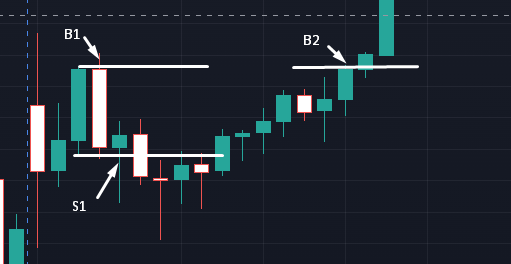






In [ ]:
value # b1 tells we bought 1st. Then S1 tell we sold 2nd. B2 tell we bought again. 

[['buy', 17816.85, 17750.45],
 ['sell', 17750.45, 17816.85],
 ['buy', 17816.85, 17750.45],
 ['target', 17923.05, 22]]

In [ ]:
# we need to trade only once. And the opposite level becomes SL.

In [ ]:
if value[0][0] == 'sell':
  points = value[0][1] - value[1][1]
  total=(points*lots*lot_size) - (taxes*lots)
elif value[0][0] == 'buy':
  points = value[1][1] - value[0][1]
  total=(points*lots*lot_size) - (taxes*lots)

In [ ]:
print('PNL:',total) # we made a loss of:

PNL: -3619.999999999891


In [ ]:
(17750.45-17816.85)*50 - 300 # 300 is transaction charges
# results matched

-3619.999999999891

SIMILARLY CHECKING FOR CASE 02-11-2021

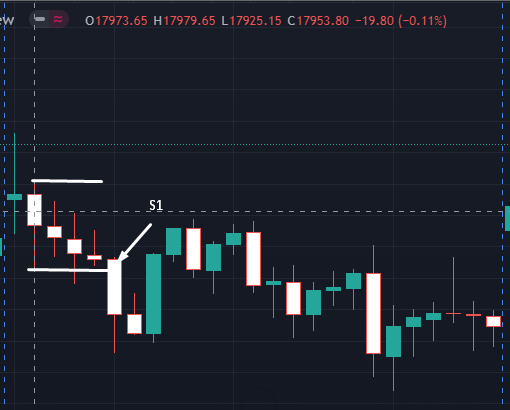

In [ ]:
data1=data[data['Date'] == '2021-11-02'].reset_index().drop('index',axis=1) # checking for 1 case 
refernce_candle = 2
buy = data1['high'][refernce_candle] + 5 # add buffer
print('Buy_level:',buy)
sell = data1['low'][refernce_candle] - 5 # subtract buffer
print('Sell_level:',sell)
max_loss=abs(buy-sell)
print('Max Loss:',max_loss)
# setting parameters
lots=1 # keeping 1 lot for now
lot_size=50
limit=3000 # 1 day loss limit
taxes=300 # per lot approx transaction charges
print('Loss expected:',lot_size*max_loss)

value=[]
cond=0
# if high of next candle will be greater than our buy level, we will buy. Target 2.45 candle close.
# if low of next candle will be lesser than our sell level, we will sell. Target 2.45 candle close.
for i in range(refernce_candle+1,len(data1)-1): # loop starts from next candle (indexing)
  if data1['high'][i] > buy and cond != 1: 
    value.append(['buy',buy,sell])
    cond = 1 # will make it 1 if already in buy positon, so that no next buying happens.
  elif data1['low'][i] < sell and cond != 2:
    value.append(['sell',sell,buy])
    cond = 2 # will make it 2 if already in sell positon, so that no next selling happens.
  if i==22:
    value.append(['target',data1['close'][i],i])

if value[0][0] == 'sell':
  points = value[0][1] - value[1][1]
  total=(points*lots*lot_size) - (taxes*lots)
elif value[0][0] == 'buy':
  points = value[1][1] - value[0][1]
  total=(points*lots*lot_size) - (taxes*lots)

print('PNL:',total) # we made a loss of:

Buy_level: 17973.9
Sell_level: 17928.45
Max Loss: 45.45000000000073
Loss expected: 2272.5000000000364
PNL: 1257.5000000000728


In [ ]:
# 2.45 close was 17897.30
(17928.45 - 17897.30)* 50 - 300

1257.5000000000728

In [ ]:
# Results matched

**lets check for 9 months**

In [ ]:
# setting parameters
lots=1 # keeping 1 lot for now
lot_size=50
limit=3000 # 1 day loss limit
taxes=300 # per lot approx transaction charges

dict1 = {'Date':[],'Points':[]}
df1 = pd.DataFrame(dict1)
for day in tq.tqdm(all_dates_list):
  if day=="2021-11-04": # removing diwali day
    continue
  data1=data[data['Date'] == day ].reset_index().drop('index',axis=1) # checking for 1 case 
  refernce_candle = 2
  
  buy = data1['high'][refernce_candle] + 5 # add buffer
  sell = data1['low'][refernce_candle] - 5 # subtract buffer
  max_loss=abs(buy-sell)
  value=[]
  cond=0
  if (max_loss*lot_size) > limit: # do not trade condition
    continue
  # if high of next candle will be greater than our buy level, we will buy. Target 2.45 candle close.
  # if low of next candle will be lesser than our sell level, we will sell. Target 2.45 candle close.
  for i in range(refernce_candle+1,len(data1)-1): # loop starts from next candle (indexing)
    if data1['high'][i] > buy and cond != 1: 
      value.append(['buy',buy,sell])
      cond = 1 # will make it 1 if already in buy positon, so that no next buying happens.
    elif data1['low'][i] < sell and cond != 2:
      value.append(['sell',sell,buy])
      cond = 2 # will make it 2 if already in sell positon, so that no next selling happens.
    if i==22:
      value.append(['target',data1['close'][i],i])
  if value[0][0] == 'sell':
    points = value[0][1] - value[1][1]
    total=(points*lots*lot_size) - (taxes*lots)
  elif value[0][0] == 'buy':
    points = value[1][1] - value[0][1]
    total=(points*lots*lot_size) - (taxes*lots)
  df1=df1.append({'Date': day, 'Points': total},ignore_index=True)

  0%|          | 0/184 [00:00<?, ?it/s]

In [ ]:
df1[df1['Date'].str.contains("2021-11")].head(2) # over 2 previous cross check cases are still matching.

,Date,Points
136,2021-11-02,1257.5
137,2021-11-03,7292.5


In [ ]:
# Metrics Calculations
win = 0
loss = 0
for i in df1['Points']:
  if i>0:
    win = win + 1
  elif i<0:
    loss = loss + 1

dfwins=df1.copy()
dfwins['wins']=[1 if dfwins['Points'][i] > 0 else 0 for i in range(0,len(dfwins))]
grouper_wins = (dfwins.wins != dfwins.wins.shift()).cumsum()
dfwins=dfwins.groupby(grouper_wins).cumsum()


dflosses=df1.copy()
dflosses['Losses']=[1 if dflosses['Points'][i] < 0 else 0 for i in range(0,len(dflosses))]
grouper_losses = (dflosses.Losses != dflosses.Losses.shift()).cumsum()
dflosses=dflosses.groupby(grouper_losses).cumsum()

In [ ]:
print("Total Trading Days: ",len(df1))
print("Total Winning Days: ",win)
print("Total Lossing Days: ",loss)
print("Max Loss for the day: ",round(min(df1['Points'])))
print("Max profit for the day till now: ",round(max(df1['Points'])))
print("Winning Days Streak: ",max(dfwins['wins']))
print("Lossing Days Streak: ",max(dflosses['Losses']))
print('Earned till now: ',round(sum(df1['Points'])))

Total Trading Days:  147
Total Winning Days:  57
Total Lossing Days:  90
Max Loss for the day:  -3255
Max profit for the day till now:  13970
Winning Days Streak:  5
Lossing Days Streak:  7
Earned till now:  17672


ROI Per Month


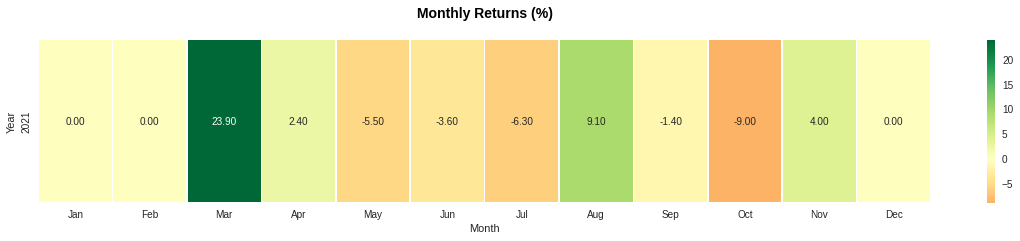

In [ ]:
final=df1.copy()
final['Date']= pd.to_datetime(final['Date'],format='%Y-%m-%d')
final = final.groupby(['Date']).sum() # combine same days trade
monthly=final.resample('1M').sum()
monthly['Percentage']=round(monthly['Points']/130000,3)
mrh.plot( monthly['Percentage'],figsize = (20, 3))
print('ROI Per Month')
plt.show()

In [ ]:
round((sum(df1[df1['Date'].str.contains("2021-05")]['Points'])/130000)*100,1) # cross checker (may month)

-5.5

In [ ]:
round((sum(df1[df1['Date'].str.contains("2021-11")]['Points'])/130000)*100,1) # cross checker (nov month)

4.0

In [ ]:
print('Average ROI Per month: ',round(sum(round(((monthly['Points']))/130000,2))/len(monthly),2)*100,' %')


Average ROI Per month:  1.0  %


In [ ]:
round((sum(df1['Points'])/130000/9),2)*100 # cross check again, total sum divided by capital divide by no of months X 100

2.0

In [ ]:
# LETS INCREASE NO. OF LOTS NOW

In [ ]:
# setting parameters
lot_size=50
limit=7500 # 1 day loss limit
taxes=300 # per lot approx transaction charges

dict1 = {'Date':[],'Points':[],'Lots':[]}
df1 = pd.DataFrame(dict1)
for day in tq.tqdm(all_dates_list):
  if day=="2021-11-04": # removing diwali day
    continue
  data1=data[data['Date'] == day ].reset_index().drop('index',axis=1) # checking for 1 case 
  refernce_candle = 2
  buy = data1['high'][refernce_candle] + 5 # add buffer
  sell = data1['low'][refernce_candle] - 5 # subtract buffer
  max_loss=abs(buy-sell)
  if (max_loss*lot_size) > limit: # do not trade condition
    continue
  lots=round(limit/(max_loss*lot_size)) # taking 
  if lots > 3:
    lots = 3
  value=[]
  cond=0
  # if high of next candle will be greater than our buy level, we will buy. Target 2.45 candle close.
  # if low of next candle will be lesser than our sell level, we will sell. Target 2.45 candle close.
  for i in range(refernce_candle+1,len(data1)-1): # loop starts from next candle (indexing)
    if data1['high'][i] > buy and cond != 1: 
      value.append(['buy',buy,sell]) 
      cond = 1 # will make it 1 if already in buy positon, so that no next buying happens.
    elif data1['low'][i] < sell and cond != 2:
      value.append(['sell',sell,buy])
      cond = 2 # will make it 2 if already in sell positon, so that no next selling happens.
    if i==22:
      value.append(['target',data1['close'][i],i])
  if value[0][0] == 'sell':
    points = value[0][1] - value[1][1]
    total=(points*lots*lot_size) - (taxes*lots)
  elif value[0][0] == 'buy':
    points = value[1][1] - value[0][1]
    total=(points*lots*lot_size) - (taxes*lots)
  df1=df1.append({'Date': day, 'Points': total,'Lots': lots},ignore_index=True)

  0%|          | 0/184 [00:00<?, ?it/s]

In [ ]:
set(df1['Lots']) # considering max to be 3

{1.0, 2.0, 3.0}

ROI Per Month


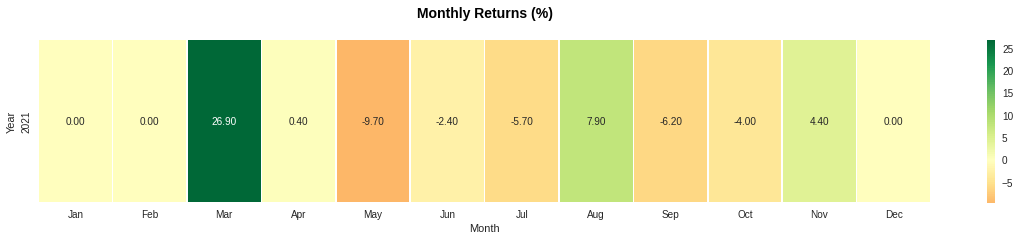

In [ ]:
final=df1.copy()
final['Date']= pd.to_datetime(final['Date'],format='%Y-%m-%d')
final = final.groupby(['Date']).sum() # combine same days trade
monthly=final.resample('1M').sum()
monthly['Percentage']=round(monthly['Points']/390000,3)
mrh.plot( monthly['Percentage'],figsize = (20, 3))
print('ROI Per Month')
plt.show()

In [ ]:
print('Average ROI Per month: ',round(sum(round(((monthly['Points']))/390000,2))/len(monthly),2)*100,' %')


Average ROI Per month:  1.0  %


# LONG TERM STORY TIME

In [ ]:
# taking all trading dates from yahoo finance daily data, 03-11 month 2021
all_dates = yf.download('^NSEI', 
                        start='2020-01-01', 
                        end='2021-11-01')
all_dates=all_dates.reset_index()
all_dates['Date']=all_dates['Date'].astype(str)
all_dates_list=list(all_dates['Date'])

[*********************100%***********************]  1 of 1 completed


In [ ]:
# %cd '/content/gdrive/MyDrive/NIFTYDATA/'
# data=pd.read_csv('/content/gdrive/MyDrive/NIFTYDATA/complete_banknifty.csv')
# data=data.rename(columns={'Open':'open','High':'high','Low':'low','Close':'close'})

In [ ]:
# making sure we do not take any pre market or after market timings
# data taken is from trading view
data=pd.read_csv('/content/gdrive/MyDrive/NIFTYDATA/NSE_NIFTYBANK-INDEX.csv')
data['date_time']=data['date_time'].astype(str)
data['Date']=data['date_time'].str.split(' ',expand=True)[0] #seperate date
data['Time']=data['date_time'].str.split(' ',expand=True)[1] # seperate time
data=data[data['Time'].str.contains('09:15:00|09:30:00|09:45:00|10:00:00|10:15:00|10:30:00|10:45:00|11:00:00|11:15:00|11:30:00|11:45:00|12:00:00|12:15:00|12:30:00|12:45:00|13:00:00|13:15:00|13:30:00|13:45:00|14:00:00|14:15:00|14:30:00|14:45:00|15:00:00|15:15:00')]
data=data.reset_index().drop('index',axis=1)

In [ ]:
# setting parameters
lot_size=25
limit=7500 # 1 day loss limit
taxes=350 # per lot approx transaction charges

dict1 = {'Date':[],'Points':[],'Lots':[]}
df1 = pd.DataFrame(dict1)
for day in tq.tqdm(all_dates_list):
  try:
    data1=data[data['Date'] == day ].reset_index().drop('index',axis=1) # checking for 1 case 
    refernce_candle = 3
    buy = data1['high'][refernce_candle] + 5 # add buffer
    sell = data1['low'][refernce_candle] - 5 # subtract buffer
    max_loss=abs(buy-sell)
    lots=round(limit/(max_loss*lot_size)) # taking 
    if lots > 3:
      lots = 3
    value=[]
    cond=0
    if max_loss*lot_size > limit: # avoid trading day
      continue
    # if high of next candle will be greater than our buy level, we will buy. Target 2.45 candle close.
    # if low of next candle will be lesser than our sell level, we will sell. Target 2.45 candle close.
    for i in range(refernce_candle+1,len(data1)-1): # loop starts from next candle (indexing)
      if data1['high'][i] > buy and cond != 1: 
        value.append(['buy',buy,sell]) 
        cond = 1 # will make it 1 if already in buy positon, so that no next buying happens.
      elif data1['low'][i] < sell and cond != 2:
        value.append(['sell',sell,buy])
        cond = 2 # will make it 2 if already in sell positon, so that no next selling happens.
      if i==22:
        value.append(['target',data1['close'][i],i])
    if value[0][0] == 'sell':
      points = value[0][1] - value[1][1]
      total=(points*lots*lot_size) - (taxes*lots)
    elif value[0][0] == 'buy':
      points = value[1][1] - value[0][1]
      total=(points*lots*lot_size) - (taxes*lots)
    df1=df1.append({'Date': day, 'Points': total,'Lots': lots},ignore_index=True)
  except:
    continue

  0%|          | 0/454 [00:00<?, ?it/s]

In [ ]:
print("Total Trading Days: ",len(df1))
print("Days Traded",win+loss)
print("Total Winning Days: ",win)
print("Total Lossing Days: ",loss)
print("Max Loss for the day: ",round(min(df1['Points'])))
print("Max profit for the day till now: ",round(max(df1['Points'])))
print("Winning Days Streak: ",max(dfwins['wins']))
print("Lossing Days Streak: ",max(dflosses['Losses']))
print('Earned till now: ',round(sum(df1['Points'])))

Total Trading Days:  433
Days Traded 147
Total Winning Days:  57
Total Lossing Days:  90
Max Loss for the day:  -10530
Max profit for the day till now:  92198
Winning Days Streak:  5
Lossing Days Streak:  7
Earned till now:  679289


ROI Per Month


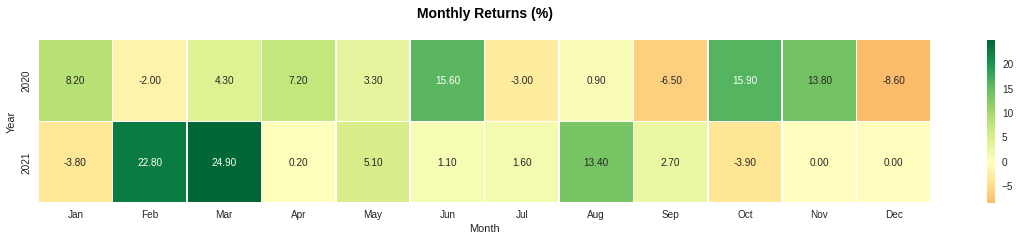

Average ROI Per month:  5.0  %


In [ ]:
final=df1.copy()
final['Date']= pd.to_datetime(final['Date'],format='%Y-%m-%d')
final = final.groupby(['Date']).sum() # combine same days trade
monthly=final.resample('1M').sum()
monthly['Percentage']=round(monthly['Points']/600000,3)
mrh.plot( monthly['Percentage'],figsize = (20, 3))
print('ROI Per Month')
plt.show()
print('Average ROI Per month: ',round(sum(round(((monthly['Points']))/600000,2))/len(monthly),2)*100,' %')


# feb data missing 2022

In [ ]:
initial=600000
Money=[]
for i in range(0,len(df1)):
  current=df1['Points'][i] + initial
  initial=current
  Money.append(initial)

In [ ]:
df1['Money']=Money

In [ ]:
import plotly.express as px
fig = px.line(df1, x="Date", y="Money",template='plotly_dark')
fig.show()